In [10]:
# Cell 1: Import libraries and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stock_model import StockPredictor
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Cell 2: Initialize and fetch data
predictor = StockPredictor(stock_symbol='RELIANCE.NS', period='2y')
data = predictor.fetch_data()
print("Data Overview:")
print(data.head())
print(f"\nData Shape: {data.shape}")

Fetching data for RELIANCE.NS...
Data fetched successfully! Shape: (495, 7)
Date range: 2023-11-07 00:00:00+05:30 to 2025-11-07 00:00:00+05:30
Data Overview:
                                  Open         High          Low        Close  \
Date                                                                            
2023-11-07 00:00:00+05:30  1158.450749  1160.957222  1151.254016  1153.363403   
2023-11-08 00:00:00+05:30  1157.433272  1161.900210  1152.345926  1159.368896   
2023-11-09 00:00:00+05:30  1159.344193  1159.368912  1143.635388  1146.787109   
2023-11-10 00:00:00+05:30  1144.305465  1149.665815  1140.583017  1148.946045   
2023-11-13 00:00:00+05:30  1152.916654  1153.760506  1147.357822  1148.797241   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-11-07 00:00:00+05:30   6960204        0.0           0.0  
2023-11-08 00:00:00+05:30   7884494        0.0           0.0  
2023-11-09 00:00:00+05

In [12]:
# Cell 3: Calculate technical indicators
data_with_indicators = predictor.calculate_technical_indicators()
print("Data with Technical Indicators:")
print(data_with_indicators[['Close', 'RSI', 'MA_10', 'MA_50', 'MACD']].tail())

Data with indicators shape: (446, 27)
Data with Technical Indicators:
                                 Close        RSI        MA_10        MA_50  \
Date                                                                          
2025-11-03 00:00:00+05:30  1484.699951  67.379445  1476.679993  1402.576008   
2025-11-04 00:00:00+05:30  1473.099976  62.406816  1477.309985  1403.542007   
2025-11-05 00:00:00+05:30  1473.099976  62.406816  1478.099988  1404.820007   
2025-11-06 00:00:00+05:30  1496.099976  67.861014  1482.869983  1406.490007   
2025-11-07 00:00:00+05:30  1478.000000  60.430592  1485.509985  1408.352007   

                                MACD  
Date                                  
2025-11-03 00:00:00+05:30  28.301604  
2025-11-04 00:00:00+05:30  26.959655  
2025-11-05 00:00:00+05:30  25.601038  
2025-11-06 00:00:00+05:30  26.079603  
2025-11-07 00:00:00+05:30  24.713470  


In [13]:
# Cell 4: Create target variable
target = predictor.create_target_variable()
print("Target variable distribution:")
print(target.value_counts())

Target distribution:
Target
1    226
0    219
Name: count, dtype: int64
Target ratio: 0.508
Target variable distribution:
Target
1    226
0    219
Name: count, dtype: int64


In [14]:
# Cell 5: Prepare features
features = predictor.prepare_features()
print("Feature Overview:")
print(features.describe())

Using 14 features: ['RSI', 'MA_ratio', 'MACD', 'MACD_signal', 'MACD_histogram', 'BB_position', 'Price_change', 'High_Low_ratio', 'Volume_ratio', 'Return_lag_1', 'Return_lag_2', 'Return_lag_3', 'Return_lag_5', 'Volatility']
Feature Overview:
              RSI    MA_ratio        MACD  MACD_signal  MACD_histogram  \
count  445.000000  445.000000  445.000000   445.000000      445.000000   
mean    50.691252    1.005626    2.489567     2.548667       -0.059101   
std     11.661324    0.041784   19.874919    18.790168        5.989796   
min     24.801413    0.920949  -37.919795   -34.435439      -15.167934   
25%     42.097383    0.978579  -10.366196   -10.705756       -3.669320   
50%     50.795534    0.998818   -0.047883    -0.587662       -0.200627   
75%     59.415790    1.034146   14.991729    16.526323        4.123539   
max     79.274047    1.104631   47.274254    43.477414       18.389649   

       BB_position  Price_change  High_Low_ratio  Volume_ratio  Return_lag_1  \
count   445.

In [15]:
# Cell 6: Train models
results, X_test, y_test = predictor.train_models()

Training set: (356, 14), Test set: (89, 14)
Training Logistic Regression...
Logistic Regression Accuracy: 0.5281
Training Random Forest...
Random Forest Accuracy: 0.5393
Training XGBoost...
XGBoost Accuracy: 0.5955

Best Model: XGBoost with accuracy: 0.5955


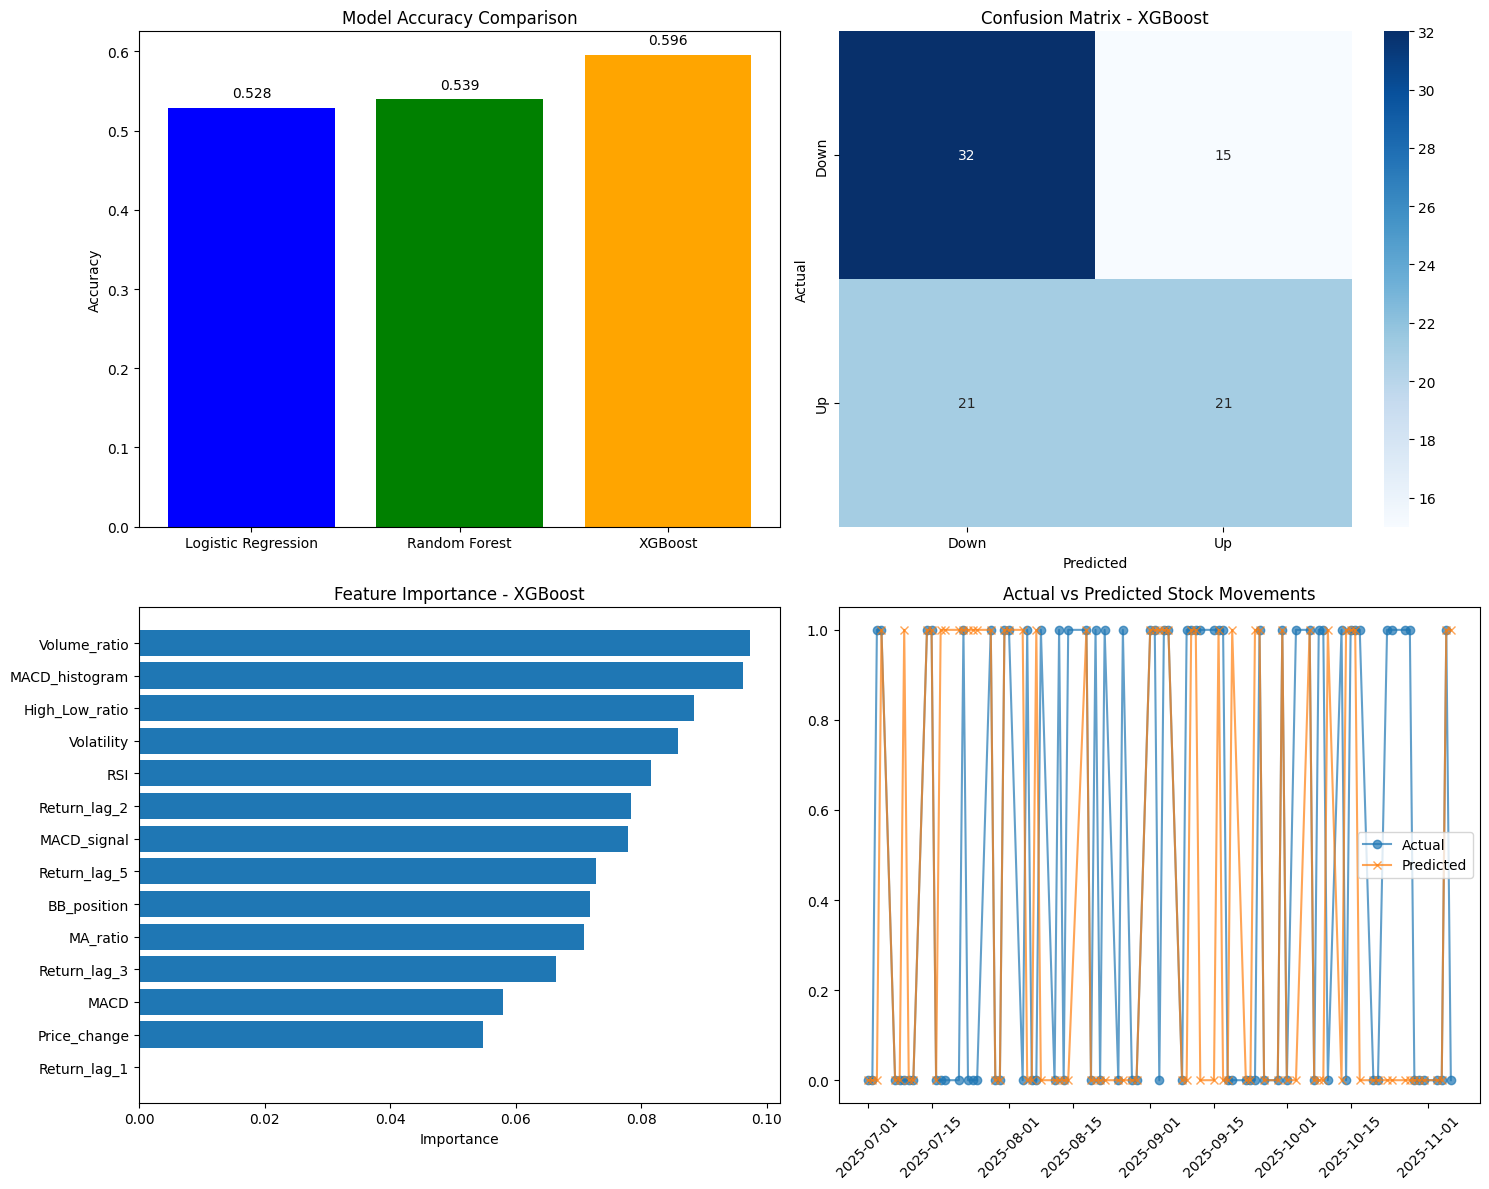


Classification Report for XGBoost:
              precision    recall  f1-score   support

        Down       0.60      0.68      0.64        47
          Up       0.58      0.50      0.54        42

    accuracy                           0.60        89
   macro avg       0.59      0.59      0.59        89
weighted avg       0.59      0.60      0.59        89



In [16]:
# Cell 7: Evaluate models
predictor.evaluate_models(results, X_test, y_test)

In [17]:
# Cell 8: Feature analysis and insights
print("Key Insights:")
print("1. Most predictive features based on feature importance")
print("2. Model performance comparison")
print("3. Market behavior patterns")

Key Insights:
1. Most predictive features based on feature importance
2. Model performance comparison
3. Market behavior patterns


In [18]:
# Cell 9: Limitations and improvements
print("Limitations:")
print("- Based only on historical price data")
print("- Doesn't consider fundamental analysis")
print("- Market sentiment and news not included")

print("\nPotential Improvements:")
print("- Add sentiment analysis from news")
print("- Include macroeconomic indicators")
print("- Use more advanced models like LSTM")

Limitations:
- Based only on historical price data
- Doesn't consider fundamental analysis
- Market sentiment and news not included

Potential Improvements:
- Add sentiment analysis from news
- Include macroeconomic indicators
- Use more advanced models like LSTM
